<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.308209,48.340609,48.128128,37.834198,-0.017212,165.593932,165.625705,-0.031773
1,0.0,1.0,73.947941,34.018126,47.750472,39.963921,-0.045070,205.635391,205.664301,-0.028910
2,0.0,2.0,72.302908,57.351251,36.473663,91.287063,0.046622,267.461508,267.397320,0.064188
3,0.0,3.0,23.723891,64.688209,96.130933,69.943793,0.006655,264.493480,264.497787,-0.004306
4,0.0,4.0,43.581473,46.816449,22.035373,69.495808,-0.083609,191.845493,191.927235,-0.081741
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.279996,66.757119,93.978865,42.390737,-0.100987,255.305730,255.395591,-0.089861
249996,999.0,246.0,90.687021,42.635585,69.058327,68.357086,-0.116789,280.621229,280.742038,-0.120809
249997,999.0,247.0,98.966621,33.498867,43.836099,56.739587,0.107572,243.148746,243.052631,0.096115
249998,999.0,248.0,47.573054,23.598160,93.535919,86.580628,0.294553,261.582314,261.259493,0.322821


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.308209,48.340609,48.128128,37.834198,-0.017212,165.593932,165.625705,-0.031773
1,0.0,1.0,73.947941,34.018126,47.750472,39.963921,-0.045070,205.635391,205.664301,-0.028910
2,0.0,2.0,72.302908,57.351251,36.473663,91.287063,0.046622,267.461508,267.397320,0.064188
3,0.0,3.0,23.723891,64.688209,96.130933,69.943793,0.006655,264.493480,264.497787,-0.004306
4,0.0,4.0,43.581473,46.816449,22.035373,69.495808,-0.083609,191.845493,191.927235,-0.081741
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.279996,66.757119,93.978865,42.390737,-0.100987,255.305730,255.395591,-0.089861
249996,999.0,246.0,90.687021,42.635585,69.058327,68.357086,-0.116789,280.621229,280.742038,-0.120809
249997,999.0,247.0,98.966621,33.498867,43.836099,56.739587,0.107572,243.148746,243.052631,0.096115
249998,999.0,248.0,47.573054,23.598160,93.535919,86.580628,0.294553,261.582314,261.259493,0.322821


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.308209,48.340609,48.128128,37.834198,-0.017212,165.593932,165.625705,-0.031773
1,0.0,1.0,73.947941,34.018126,47.750472,39.963921,-0.045070,205.635391,205.664301,-0.028910
2,0.0,2.0,72.302908,57.351251,36.473663,91.287063,0.046622,267.461508,267.397320,0.064188
3,0.0,3.0,23.723891,64.688209,96.130933,69.943793,0.006655,264.493480,264.497787,-0.004306
4,0.0,4.0,43.581473,46.816449,22.035373,69.495808,-0.083609,191.845493,191.927235,-0.081741
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.279996,66.757119,93.978865,42.390737,-0.100987,255.305730,255.395591,-0.089861
249996,999.0,246.0,90.687021,42.635585,69.058327,68.357086,-0.116789,280.621229,280.742038,-0.120809
249997,999.0,247.0,98.966621,33.498867,43.836099,56.739587,0.107572,243.148746,243.052631,0.096115
249998,999.0,248.0,47.573054,23.598160,93.535919,86.580628,0.294553,261.582314,261.259493,0.322821


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

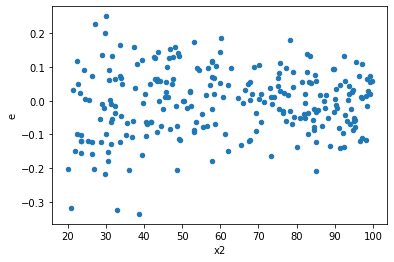

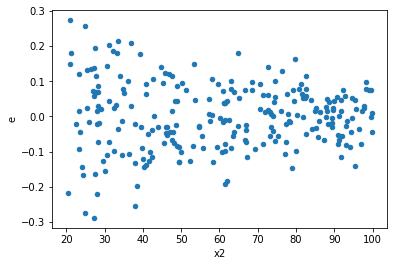

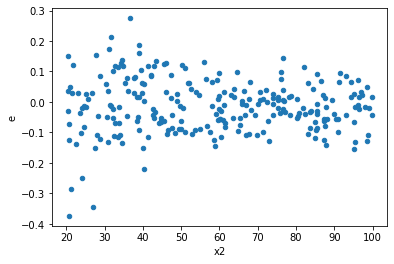

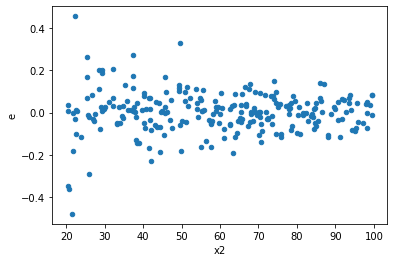

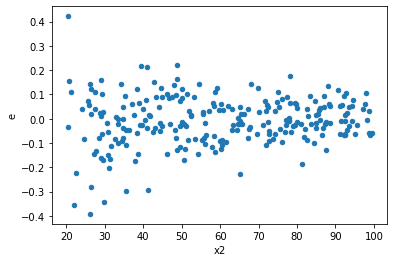

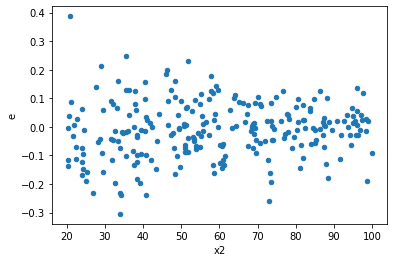

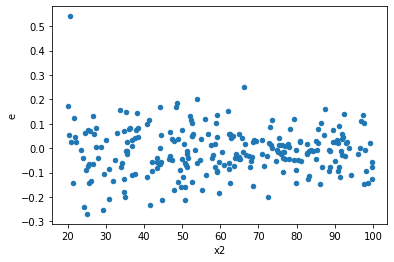

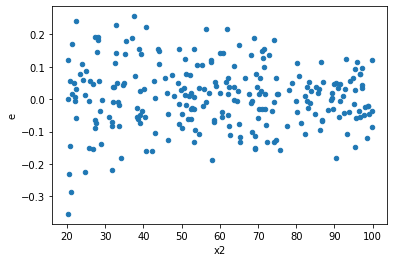

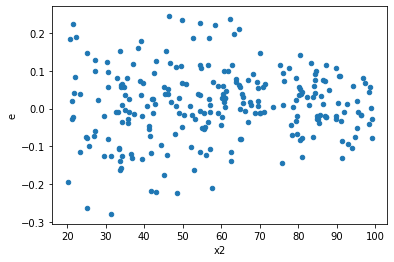

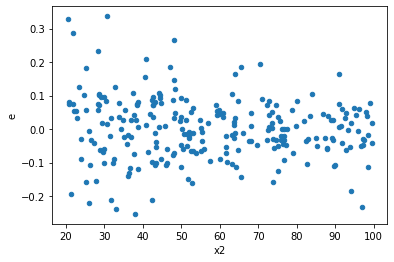

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,1.3801740575620902,0.5388706708660759,0.014376813099605106,0.005613236154854957,0.39043674811416573,6.333040593334401e-06,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,1.4272708307131485,0.3658833534948039,0.014867404486595298,0.0038112849322375405,0.2563517348084435,1.3736938274684052e-10,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,1.198581337277701,0.3728350416495937,0.012485222263309385,0.003883698350516601,0.31106361333507987,2.766545178844887e-08,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,1.7360353257511683,0.39184968821498356,0.018083701309908003,0.004081767585572746,0.2257152734178571,3.069912143605198e-12,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,1.693105647485409,0.43526583440464284,0.017636517161306344,0.004534019108381696,0.2570813197930662,1.4913243901190302e-10,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,1.3730464081267713,0.5170262228685797,0.014302566751320534,0.005385689821547705,0.37655407698415055,2.83362746277594e-06,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,1.3796417472850417,0.4826417010754114,0.014371268200885851,0.005027517719535535,0.3498311804678196,5.135327705532018e-07,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,1.3015014101468507,0.6394795122938988,0.013557306355696361,0.0066612449197281124,0.4913398535786029,0.0005885845526617197,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,1.214689444153894,0.38509265765309,0.01265301504326973,0.004011381850553021,0.31702972270523905,4.508660823536844e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    993
Reject001=1 : Homoscedasticity        7
Name: Result_test, dtype: int64